In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys 
from tqdm import tqdm
sys.path.append('/home/drdarby/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
from scipy.interpolate import griddata
import xgcm
print(xgcm.__path__)

['/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/xgcm']


In [ ]:
# Humboldt
# Petermann
# Ryder
# CH Ostenfeld
# Hagen Brae
# 79 North 
# Zachariae
# Storstrommen



In [ ]:
# Zachariae Isstrom
# 79 North
# Hagen Brae
# Academy
# CH Ostenfeld
# Ryder
# Steensby
# Petermann
# Humboldt
# Maybe: Tracy and Heilprin

In [2]:
path_year_flux = '/media/drdarby/Elements/data/N_Greenland/Glac_mass/dataverse_files/gate.nc'
year_flux_data = '/media/drdarby/Elements/data/N_Greenland/Glac_mass/dataverse_files/gate_D.csv'

In [3]:
gate = xr.open_dataset(path_year_flux)

data = pd.read_csv(year_flux_data)


In [4]:
names_no = ['HUMBOLDT_GLETSCHER','PETERMANN_GLETSCHER','ACADEMY','RYDER_GLETSCHER','HAGEN_BRAE','OSTENFELD_GLETSCHER','STEENSBY_GLETSCHER']
names_ne = ['ZACHARIAE_ISSTROM','STORSTROMMEN','NIOGHALVFJERDSFJORDEN']
names = names_no+names_ne
gate

<xarray.Dataset>
Dimensions:        (time: 2872, gate: 266)
Coordinates:
  * time           (time) datetime64[ns] 1986-04-15 1986-05-15 ... 2024-06-02
  * gate           (gate) int64 1 2 3 4 5 6 7 8 ... 344 346 347 348 349 350 351
Data variables: (12/14)
    discharge      (gate, time) float32 ...
    err            (gate, time) float32 ...
    coverage       (gate, time) float32 ...
    mean_x         (gate) int32 ...
    mean_y         (gate) int32 ...
    mean_lon       (gate) float32 ...
    ...             ...
    region         (gate) object ...
    Zwally_2012    (gate) int64 ...
    name_Bjørk     (gate) object ...
    name_Mouginot  (gate) object ...
    ID_Moon        (gate) int64 ...
    ID_Moon_dist   (gate) int64 ...
Attributes:
    featureType:      timeSeries
    title:            Greenland discharge
    summary:          Greenland discharge per gate
    keywords:         Greenland; Ice Discharge; Calving; Submarine Melt
    source:           git commit: 182ea0b
    creator_name:     Ken Mankoff
    creator_email:    kdm@geus.dk
    creator_url:      http://kenmankoff.com
    institution:      GEUS
    references:       10.22008/promice/ice_discharge
    product_version:  2.0

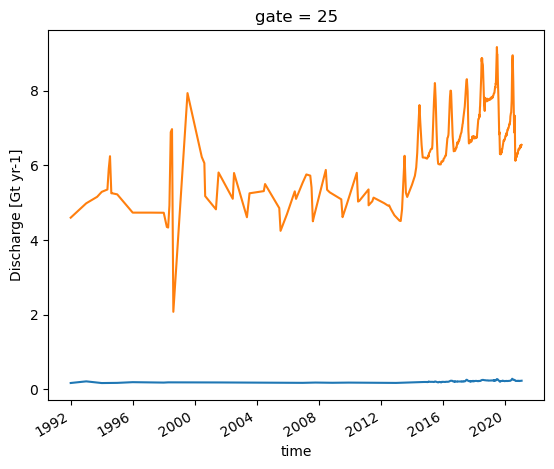

In [44]:
cut = gate['name_Mouginot']==names[0]
ind = np.array(gate.gate.where(cut).dropna(dim='gate',how='all')).astype(int)
gate=gate.sel(time=slice('1992-01','2021-01'))
gate['discharge'].sel(gate=ind[1]).plot()
gate['discharge'].sel(gate=ind[0]).plot()

In [17]:
gate.where(np.logical_or(gate['region']=='NO',gate['region']=='NE'))['name_Mouginot']

names_no = ['HUMBOLDT_GLETSCHER','PETERMANN_GLETSCHER','ACADEMY','RYDER_GLETSCHER','HAGEN_BRAE','OSTENFELD_GLETSCHER','STEENSBY_GLETSCHER']
names_ne = ['ZACHARIAE_ISSTROM','STORSTROMMEN','NIOGHALVFJERDSFJORDEN']
names = names_no+names_ne

    



<xarray.DataArray 'name_Mouginot' (gate: 266)>
array(['JUNGERSEN_HENSON_NARAVANA', 'JUNGERSEN_HENSON_NARAVANA',
       'MARIE_SOPHIE_GLETSCHER', 'HAGEN_BRAE', 'BRIKKERNE_GLETSCHER',
       'ACADEMY', 'HARDER_GLETSCHER', 'RYDER_GLETSCHER',
       'OSTENFELD_GLETSCHER', 'STEENSBY_GLETSCHER', 'OSTENFELD_GLETSCHER',
       'OSTENFELD_GLETSCHER', 'RYDER_GLETSCHER', 'RYDER_GLETSCHER',
       'PETERMANN_GLETSCHER_N', 'PETERMANN_GLETSCHER_N',
       'PETERMANN_GLETSCHER', 'HUMBOLDT_GLETSCHER',
       'NIOGHALVFJERDSFJORDEN', 'HUMBOLDT_GLETSCHER', 'ZACHARIAE_ISSTROM',
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'WALTERSHAUSEN', nan, 'ADOLF_HOEL', nan, nan, nan,
       'GERARD_DE_GEER', nan, nan, 'JAETTEGLETSCHER', nan, nan, nan,
       'NORDENSKIOLD_NE', nan, nan, 'HISINGER_GLETSCHER', nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan], dtype=object)
Coordinates:
  * gate     (gate) int64 1 2 3 4 5 6 7 8 9 ... 343 344 346 347 348 349 350 351
Attributes:
    long_name:  Nearest name from Mouginot (2019)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


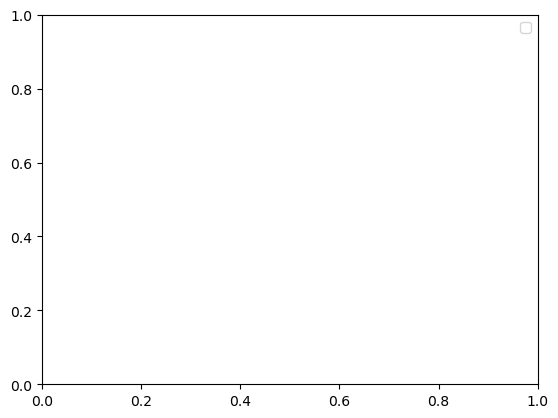

In [5]:
path_cumu_mass = '/media/drdarby/Elements/data/N_Greenland/Glac_mass/pnas.1904242116.sd02.csv'
path_year_flux = '/media/drdarby/Elements/data/N_Greenland/Glac_mass/yearly_flux.sd02.csv'
time = np.array(pd.read_csv(path_cumu_mass,header=3).iloc[0])[2:]

#locations

data = pd.read_csv(path_cumu_mass,header=4)
region_cut = data['REGION']=='NO'
names_no = ['HUMBOLDT_GLETSCHER','PETERMANN_GLETSCHER','ACADEMY','RYDER_GLETSCHER','HAGEN_BRAE','OSTENFELD_GLETSCHER','STEENSBY_GLETSCHER','NO_NONAME1']

NO_gla = data[region_cut]
name_cut_no = NO_gla['NAME']==names_no[0]


#plt.plot(np.array(time).astype(float), np.array(NO_gla[name_cut_no].loc[121][2:]),label=names[0])
#
plt.legend()
#data_names = pd.read_csv(buoy_filepaths[0],delimiter='\t').columns
#data = pd.read_csv(buoy_filepaths[0],sep='\s+',header=0,na_values=999)

In [6]:
time = np.array(NO_gla[name_cut].columns[15:15+47]).astype('float')
time


NameError: name 'name_cut' is not defined

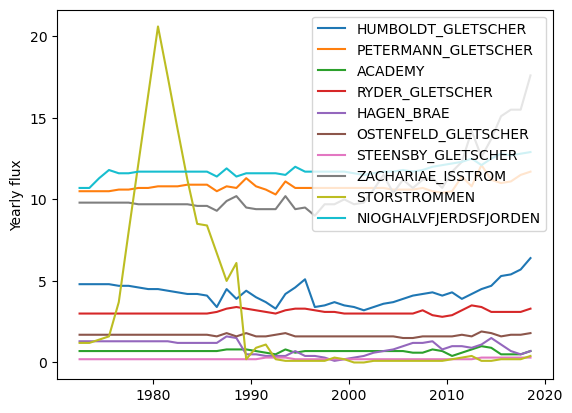

In [10]:
data = pd.read_csv(path_year_flux,header=2)
#time = np.array(NO_gla[name_cut].columns[15:15+47]).astype('float')

region_cut_no = data['REGION']=='NO'
names_no = ['HUMBOLDT_GLETSCHER','PETERMANN_GLETSCHER','ACADEMY','RYDER_GLETSCHER','HAGEN_BRAE','OSTENFELD_GLETSCHER','STEENSBY_GLETSCHER']
names_ne = ['ZACHARIAE_ISSTROM','STORSTROMMEN','NIOGHALVFJERDSFJORDEN']
names = names_no+names_ne
#NO_gla = data[region_cut_no]name_cut  = data['NAME']==names[i
name_cut  = data['NAME']==names[0]
time = np.array(data[name_cut].columns[15:15+47]).astype('float')

lat_points =[]
lon_points = []

for i in range(0,len(names)):
    name_cut  = data['NAME']==names[i]
    plt.plot(time,data[name_cut].loc[data[name_cut].index[0]][15:15+47],label=names[i])
    #name_cut = NO_gla['NAME']==names_ne[i]
    lat_points.append(np.array(data[name_cut]['LAT']).astype('float')[0])
    lon_points.append(np.array(data[name_cut]['LON']).astype('float')[0])

    plt.ylabel('Yearly flux')
    plt.legend()

In [93]:
data[name_cut]['LAT']
data[name_cut]['LON']



,NAME,REGION,LAT,LON,AREA (km2),mm SLR,Unnamed: 6,Unnamed: 7,LT or TW,METHOD,...,2009.5.1,2010.5.1,2011.5.1,2012.5.1,2013.5.1,2014.5.1,2015.5.1,2016.5.1,2017.5.1,2018.5.1
138,NIOGHALVFJERDSFJORDEN,NE,78.7,-29.0,112678,601.3,NaN,0.225288825316,TW,MC,...,0.6,0.8,0.7,0.7,0.6,0.6,0.7,0.7,0.7,0.7


In [5]:
grid_filepath = '/media/drdarby/Elements/data/L1_llc1080/L1_N_Greenland_grid.nc'
grid = xr.open_dataset(grid_filepath)#.rename({'XC':'longitude','YC':'latitude'})
llc1080_path = '/media/drdarby/Elements/data/N_Greenland/solution_output/'
llc1080_files, llc1080_filepath = tools.get_data_paths_from_binary(llc1080_path,'llc_1080',file_end='nc')
data_1080 = xr.open_mfdataset(llc1080_filepath).set_coords({'longitude','latitude'})

#data_1080 = data_1080.drop_vars('time')
#data_1080 = data_1080.rename({'iterations':'time'})
#data_1080.coords['time'] = np.array(time)
#locations

#data = pd.read_csv(path_yearly_flux,header=4)

In [6]:
#convert data to usable time
sec_itr_1080 = 300
def date_to_iter_number(date,seconds_per_iter = 60):

    total_seconds = (date-datetime(1992,1,1)).total_seconds()
    iter_number = total_seconds/seconds_per_iter
    # print(iter_number)
    return(iter_number)

def iter_number_to_date(iter_number,seconds_per_iter=60):

    total_seconds = iter_number*seconds_per_iter
    date = datetime(1992,1,1) + timedelta(seconds=total_seconds)
    # print(date)
    return(date)
time_snap = []
for i in range(0,len(data_1080.iterations)):
    t_date = iter_number_to_date(np.array(data_1080.iterations)[i],seconds_per_iter=sec_itr_1080)
    time_snap.append(t_date)


In [7]:
data_1080 = data_1080.drop_vars('time')
data_1080 = data_1080.rename({'iterations':'time'})
data_1080.coords['time'] = np.array(time_snap)
data_1080 = data_1080.rename({'rows':'Y','cols':'X'})


In [122]:
grid

<xarray.Dataset>
Dimensions:  (Y: 720, X: 720, Xp1: 721, Yp1: 721, Z: 50)
Dimensions without coordinates: Y, X, Xp1, Yp1, Z
Data variables: (12/16)
    XC       (Y, X) float32 ...
    YC       (Y, X) float32 ...
    XG       (Y, X) float32 ...
    YG       (Y, X) float32 ...
    AngleCS  (Y, X) float32 ...
    AngleSN  (Y, X) float32 ...
    ...       ...
    HFacC    (Z, Y, X) float32 ...
    HFacW    (Z, Y, Xp1) float32 ...
    HFacS    (Z, Yp1, X) float32 ...
    drF      (Z) float32 ...
    Depth    (Y, X) float32 ...
    rA       (Y, X) float32 ...

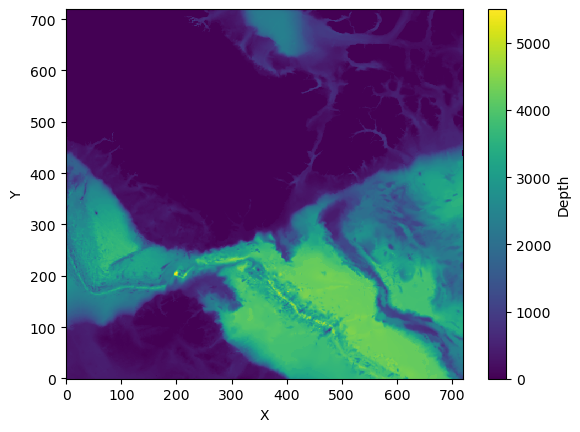

In [121]:
grid.Depth.plot()

In [35]:
points_tuple = [] 
for k in range(0,len(lon_points)):
    abslon = np.abs(grid.XC.T-lon_points[k])
    abslat = np.abs(grid.YC.T-lat_points[k])
    c = np.maximum(abslon, abslat)
    ind = np.unravel_index(np.argmin(np.array(c), axis=None),c.shape)
    points_tuple.append(ind)

points_i = []
points_j = []
for h in range(0,len(list(dict.fromkeys(points_tuple)))):
    tups = list(dict.fromkeys(points_tuple))[h]
    points_i.append(tups[1])
    points_j.append(tups[0])

NameError: name 'lon_points' is not defined

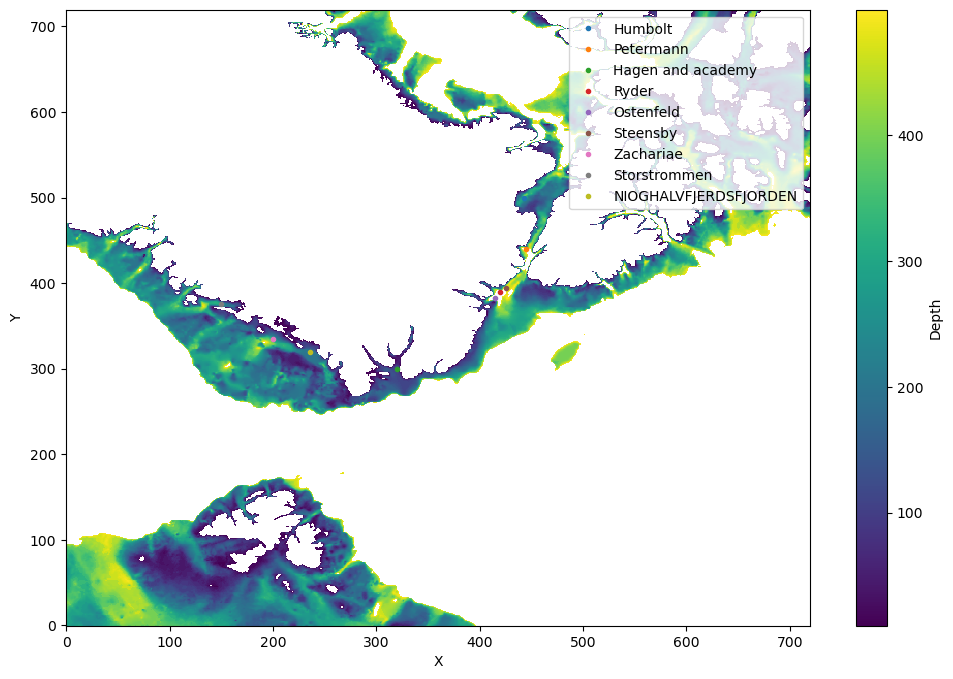

In [36]:
plt.figure(figsize=(12,8))
grid.Depth.where(np.logical_and((grid.Depth>0),(grid.Depth<500))).plot()
# for m in range(0,len(points_i)):
#     plt.plot(points_j[m],points_i[m],'.',label=names[m])
#     plt.legend()
plt.plot(443,500,'.', label = 'Humbolt' )
plt.plot(445,440,'.', label = 'Petermann' )

plt.plot(320,300,'.',label='Hagen and academy')
plt.plot(420,390,'.', label = 'Ryder')
plt.plot(415,383,'.', label = 'Ostenfeld' )
plt.plot(425,394,'.', label='Steensby')
plt.plot(200,335,'.', label = 'Zachariae' )
plt.plot(150,375,'.', label = 'Storstrommen' )
plt.plot(236,320,'.', label = 'NIOGHALVFJERDSFJORDEN' )

points_ocean_i = [443,445,320,420,320,415,425,200,150,236]
points_ocean_j = [500,440,300,390,300,383,394,335,375,320]
plt.legend()

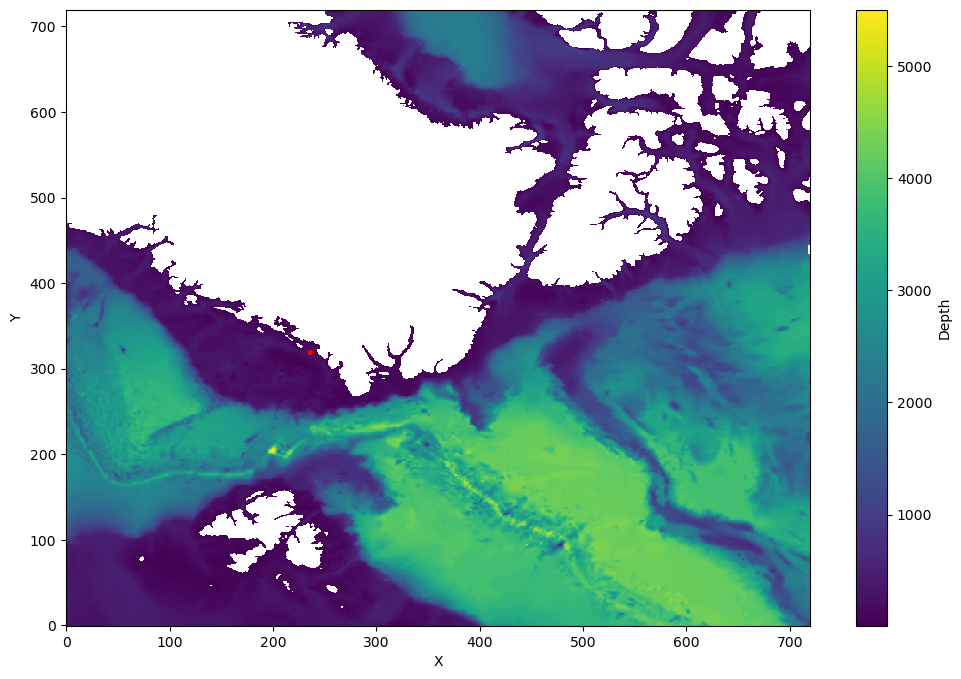

In [186]:
np.array(grid.Depth.sel(X=445,Y=440))
plt.plot(236,320,'r.', label = 'NIOGHALVFJERDSFJORDEN' )


In [204]:
time.astype(int).astype(datetime)[20:]

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018], dtype=object)

In [ ]:
data_1080['Theta'].sel(X=points_ocean_i[i],Y=points_ocean_j[i]).mean(dim='depths')

In [8]:
points_ocean_i = [443,445,320,420,320,415,425,200,150,236]
points_ocean_j = [500,440,300,390,300,383,394,335,375,320]

# for i in range(0,len(names)):
#     data_1080['Theta'].sel(X=points_ocean_i[i],Y=points_ocean_j[i]).mean(dim='depths').plot(label='temp')
#     #plt.plot(time.astype(int).astype(datetime)[20:],)
#     name_cut  = data['NAME']==names[i]
#     plt.plot(time.astype(int).astype(datetime)[20:],data[name_cut].loc[data[name_cut].index[0]][15+20:15+47],label=names[i])
#     plt.legend()
#     plt.show()

In [18]:
# time_date = []
# for l in range(0,len(time)):
#     time_date.append(datetime(time.astype(int)[l],6,1))

In [9]:
depth_at_points = []
for i in range(0,len(points_ocean_i)):
    depth = np.array(grid.Depth.sel(X=points_ocean_i[i],Y=points_ocean_j[i]))
    depth_at_points.append(depth)

In [11]:
gate=gate.sel(time=slice('1992-01','2021-01'))
#data_1080 = data_1080.rename({'rows':'Y','cols':'X'})


In [69]:

for i in tqdm(range(9,len(names))):
    fig, ax = plt.subplots(layout='constrained',figsize=(12,8))
    #name_cut  = data['NAME']==names[i]
    cut = gate['name_Mouginot']==names[i]
    ind = np.array(gate.gate.where(cut).dropna(dim='gate',how='all')).astype(int)
    data_1080['Theta'].sel(X=points_ocean_i[i],Y=points_ocean_j[i]).mean(dim='depths',skipna=True).plot(label='temp',ax=ax,color='r')
    ax.set_ylabel('Depth Average Temperature [$^\circ$C]')
    plt.title('Depth = '+str(depth_at_points[i]))
    ax.legend()
    ax2 = ax.twinx()
    total_dis = 0
    if len(ind)>1:
        for m in ind:
            total_dis += gate['discharge'].sel(gate=m)
            print('added gate '+str(m))
        print('done')
        total_dis.plot(ax=ax2,label=names[i])
    else:
        gate['discharge'].sel(gate=ind[0]).plot(ax=ax2,label=names[i])
    ax2.set_title('')
    #ax2.set_ylabel('Yearly flux')
    #ax2.plot(time_date[20:],data[name_cut].loc[data[name_cut].index[0]][15+20:15+47],label=names[i],color='r')
    ax2.legend()
    plt.savefig('./temp_and_flux_'+names[i]+'_Mankoff.png')
    plt.close()

100%|████████████████████████████████████████████| 1/1 [03:23<00:00, 203.39s/it]


In [68]:
names[8]

'STORSTROMMEN'

In [67]:
np.array(gate['name_Bjørk'])

array(['Jungersen Gletsjer', 'Jungersen Gletsjer',
       'Marie Sophie Gletsjer', 'Hagen Br', 'Harder Gletsjer',
       'Academy GGletsjer', 'C.H. Ostenfeld Gletsjer', 'Ryder Gletsjer',
       'C.H. Ostenfeld Gletsjer', 'Steensby Gletsjer',
       'C.H. Ostenfeld Gletsjer', 'C.H. Ostenfeld Gletsjer',
       'Ryder Gletsjer', 'Ryder Gletsjer', 'Sigurd Berg Gletsjer',
       'Porsild Gletsjer', 'Petermann Gletsjer', 'Sermersuaq',
       'Zachariae Isstrm', 'Sermersuaq', 'Zachariae Isstrm',
       'Arfalluarfiup Sermia', 'Arfalluarfiup Sermia', 'Neqip Sermia',
       'Kangerluarsuup Sermia', 'Toornaarsulissuup Sermii',
       'Toornaarsulissuup Sermii', 'Tuttulipaluup Sermia',
       'Qeqertaarsuusarsuup Sermia', 'Qaqujaarsuup Sermia',
       'Ullip Sermia', 'Ullip Sermia', 'Ullip Sermia', 'Ullip Sermia',
       'Savissuup Sermia', 'Savissuup Sermia', 'Savissuup Sermia',
       'Yngvar Nielsen Gletsjer', 'Yngvar Nielsen Gletsjer',
       'Innaqqissorsuup Oqquani Sermeq', 'Yngvar Nielsen 

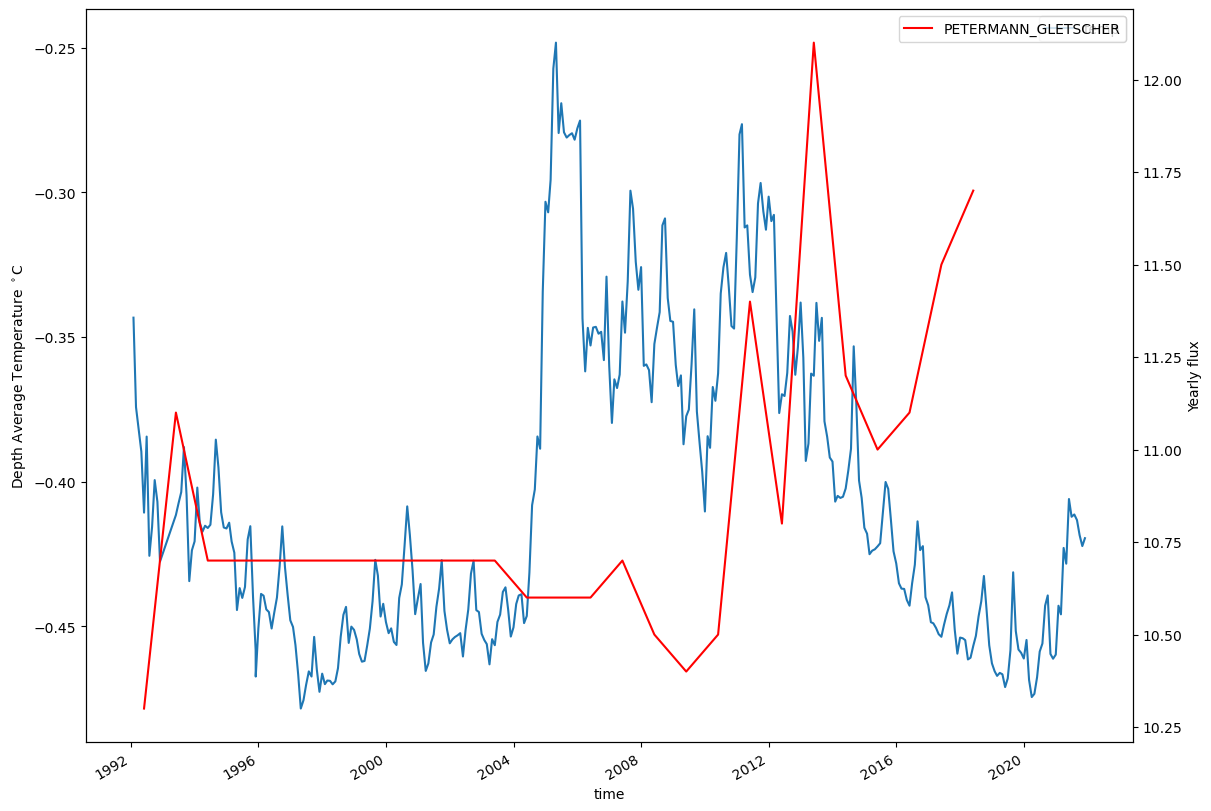

In [237]:
i=1
fig, ax = plt.subplots(layout='constrained',figsize=(12,8))
name_cut  = data['NAME']==names[i]
data_1080['Theta'].sel(X=points_ocean_i[i],Y=points_ocean_j[i]).mean(dim='depths',skipna=True).plot(label='temp',ax=ax)
ax.set_ylabel('Depth Average Temperature $^\circ$C')
ax.legend()
ax2 = ax.twinx()
ax2.set_ylabel('Yearly flux')
ax2.plot(time_date[20:],data[name_cut].loc[data[name_cut].index[0]][15+20:15+47],label=names[i],color='r')
ax2.legend()


added gate 9
added gate 15
added gate 17
done


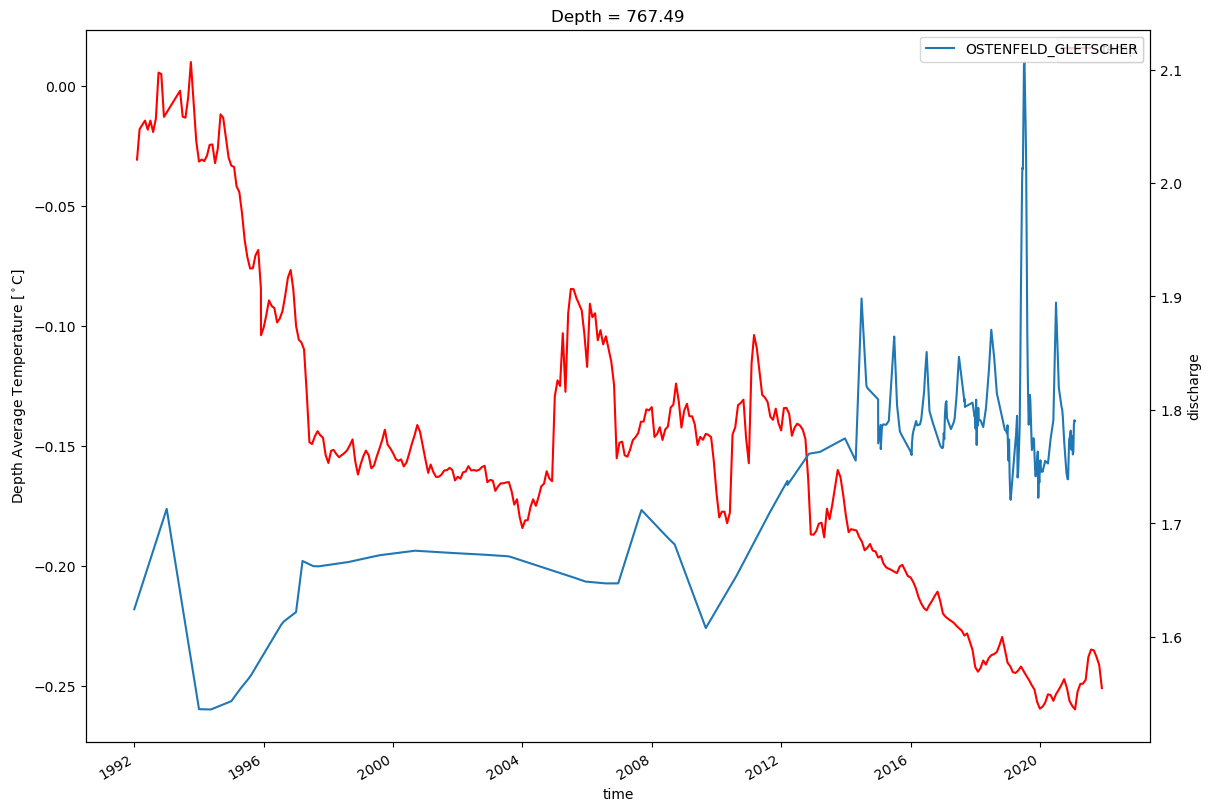

In [13]:
i=5
fig, ax = plt.subplots(layout='constrained',figsize=(12,8))
    #name_cut  = data['NAME']==names[i]
cut = gate.where(np.logical_or(gate['region']=='NO',gate['region']=='NE'))['name_Mouginot']==names[i]
ind = np.array(gate.gate.where(cut).dropna(dim='gate',how='all')).astype(int)
data_1080['Theta'].sel(X=points_ocean_i[i],Y=points_ocean_j[i]).where(data_1080.depths>100).mean(dim='depths',skipna=True).plot(label='temp',ax=ax,color='r')
ax.set_ylabel('Depth Average Temperature [$^\circ$C]')
plt.title('Depth = '+str(depth_at_points[i]))
ax.legend()
ax2 = ax.twinx()
total_dis = 0
if len(ind)>1:
    for m in ind:
        total_dis += gate['discharge'].sel(gate=m)
        print('added gate '+str(m))
    print('done')
    total_dis.plot(ax=ax2,label=names[i])
else:
    gate['discharge'].sel(gate=ind[0]).plot(ax=ax2,label=names[i])
ax2.set_title('')
    #ax2.set_ylabel('Yearly flux')
    #ax2.plot(time_date[20:],data[name_cut].loc[data[name_cut].index[0]][15+20:15+47],label=names[i],color='r')
ax2.legend()

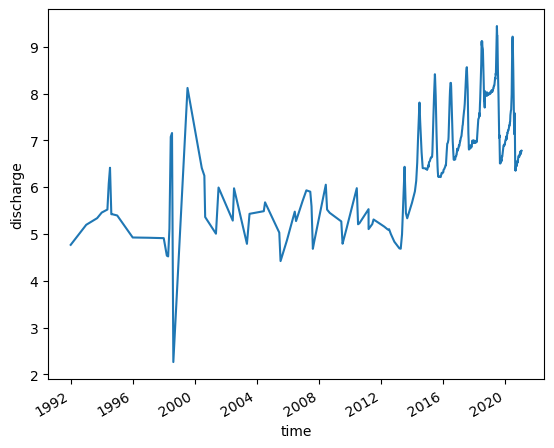

In [55]:
(gate['discharge'].sel(gate=ind[0])+gate['discharge'].sel(gate=ind[1])+0).plot(label=names[i])
plt.show()

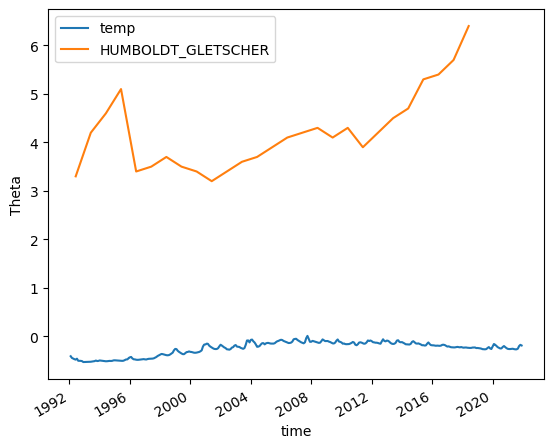

In [224]:
i=0
data_1080['Theta'].sel(X=points_ocean_i[i],Y=points_ocean_j[i]).mean(dim='depths').plot(label='temp')
name_cut  = data['NAME']==names[i]
plt.plot(time_date[20:],data[name_cut].loc[data[name_cut].index[0]][15+20:15+47],label=names[i])
plt.legend()

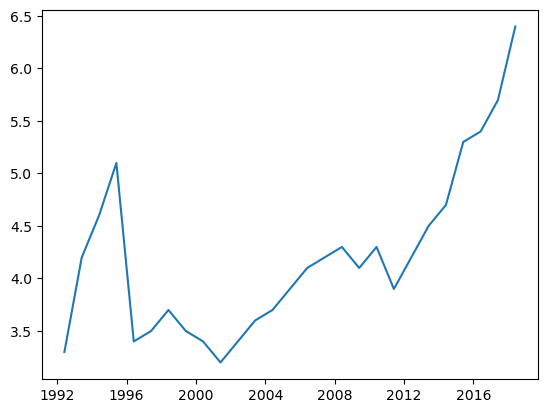

In [223]:
name_cut  = data['NAME']==names[i]
plt.plot(time_date[20:],data[name_cut].loc[data[name_cut].index[0]][15+20:15+47],label=names[i])

In [221]:
time_date = []
for l in range(0,len(time)):
    time_date.append(datetime(time.astype(int)[l],6,1))

In [222]:
time_date

[datetime.datetime(1972, 6, 1, 0, 0),
 datetime.datetime(1973, 6, 1, 0, 0),
 datetime.datetime(1974, 6, 1, 0, 0),
 datetime.datetime(1975, 6, 1, 0, 0),
 datetime.datetime(1976, 6, 1, 0, 0),
 datetime.datetime(1977, 6, 1, 0, 0),
 datetime.datetime(1978, 6, 1, 0, 0),
 datetime.datetime(1979, 6, 1, 0, 0),
 datetime.datetime(1980, 6, 1, 0, 0),
 datetime.datetime(1981, 6, 1, 0, 0),
 datetime.datetime(1982, 6, 1, 0, 0),
 datetime.datetime(1983, 6, 1, 0, 0),
 datetime.datetime(1984, 6, 1, 0, 0),
 datetime.datetime(1985, 6, 1, 0, 0),
 datetime.datetime(1986, 6, 1, 0, 0),
 datetime.datetime(1987, 6, 1, 0, 0),
 datetime.datetime(1988, 6, 1, 0, 0),
 datetime.datetime(1989, 6, 1, 0, 0),
 datetime.datetime(1990, 6, 1, 0, 0),
 datetime.datetime(1991, 6, 1, 0, 0),
 datetime.datetime(1992, 6, 1, 0, 0),
 datetime.datetime(1993, 6, 1, 0, 0),
 datetime.datetime(1994, 6, 1, 0, 0),
 datetime.datetime(1995, 6, 1, 0, 0),
 datetime.datetime(1996, 6, 1, 0, 0),
 datetime.datetime(1997, 6, 1, 0, 0),
 datetime.da